<a href="https://colab.research.google.com/github/StanislavParkhomenko/Lab_Neiro/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Для роботи з даними
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Для роботи з Keras
from keras.models import Sequential # модель прямого розповсюдження
from keras.layers import Dense # повнозв'язні прошарки

In [78]:
pokedex = pd.read_csv('./pokedex_b.csv')
pokedex[:5]

,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,144,Articuno,85,100,1.7,90,0.0,95,125,85,ice,55.4,1,1
1,145,Zapdos,90,85,1.6,90,0.0,125,90,100,electric,52.6,1,1
2,146,Moltres,100,90,2.0,90,0.0,125,85,90,fire,60.0,1,1
3,150,Mewtwo,150,70,2.0,106,0.0,194,120,140,psychic,122.0,1,1
4,151,Mew,100,100,0.4,100,0.0,100,100,100,psychic,4.0,1,1


In [79]:
pokedex = pokedex.drop('pokedex_number', axis=1)
pokedex = pokedex.drop('name', axis=1)

pokedex[:5]

,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,85,100,1.7,90,0.0,95,125,85,ice,55.4,1,1
1,90,85,1.6,90,0.0,125,90,100,electric,52.6,1,1
2,100,90,2.0,90,0.0,125,85,90,fire,60.0,1,1
3,150,70,2.0,106,0.0,194,120,140,psychic,122.0,1,1
4,100,100,0.4,100,0.0,100,100,100,psychic,4.0,1,1


In [80]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   attack           1402 non-null   int64  
 1   defense          1402 non-null   int64  
 2   height_m         1402 non-null   float64
 3   hp               1402 non-null   int64  
 4   percentage_male  1402 non-null   float64
 5   sp_attack        1402 non-null   int64  
 6   sp_defense       1402 non-null   int64  
 7   speed            1402 non-null   int64  
 8   type             1402 non-null   object 
 9   weight_kg        1402 non-null   float64
 10  generation       1402 non-null   int64  
 11  is_legendary     1402 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 131.6+ KB


In [81]:
pokedex['is_legendary'].value_counts(normalize=True)

0    0.507846
1    0.492154
Name: is_legendary, dtype: float64

In [82]:
pokedex['type'].unique()

array(['ice', 'electric', 'fire', 'psychic', 'water', 'rock', 'steel',
       'dragon', 'ground', 'normal', 'ghost', 'dark', 'grass', 'flying',
       'bug', 'fairy', 'poison', 'fighting'], dtype=object)

In [83]:
pokedex[['type']] = pokedex[['type']].stack().rank(method='dense').unstack()
pokedex.head()

,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,85,100,1.7,90,0.0,95,125,85,12.0,55.4,1,1
1,90,85,1.6,90,0.0,125,90,100,4.0,52.6,1,1
2,100,90,2.0,90,0.0,125,85,90,7.0,60.0,1,1
3,150,70,2.0,106,0.0,194,120,140,15.0,122.0,1,1
4,100,100,0.4,100,0.0,100,100,100,15.0,4.0,1,1


In [84]:
X = pokedex.drop('is_legendary',axis = 1)
Y = pd.get_dummies(pokedex.is_legendary, prefix='is_Legendary')
X
Y

,is_Legendary_0,is_Legendary_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1397,1,0
1398,1,0
1399,1,0
1400,1,0


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [86]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [87]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16, verbose=2)

Epoch 1/50
64/64 - 1s - loss: 0.8454 - accuracy: 0.5711 - val_loss: 0.5384 - val_accuracy: 0.6927 - 956ms/epoch - 15ms/step
Epoch 2/50
64/64 - 0s - loss: 0.4642 - accuracy: 0.7777 - val_loss: 0.3796 - val_accuracy: 0.8492 - 107ms/epoch - 2ms/step
Epoch 3/50
64/64 - 0s - loss: 0.3401 - accuracy: 0.8755 - val_loss: 0.3045 - val_accuracy: 0.8994 - 113ms/epoch - 2ms/step
Epoch 4/50
64/64 - 0s - loss: 0.2770 - accuracy: 0.9032 - val_loss: 0.2574 - val_accuracy: 0.9274 - 116ms/epoch - 2ms/step
Epoch 5/50
64/64 - 0s - loss: 0.2405 - accuracy: 0.9308 - val_loss: 0.2281 - val_accuracy: 0.9330 - 132ms/epoch - 2ms/step
Epoch 6/50
64/64 - 0s - loss: 0.2178 - accuracy: 0.9338 - val_loss: 0.2099 - val_accuracy: 0.9330 - 124ms/epoch - 2ms/step
Epoch 7/50
64/64 - 0s - loss: 0.2028 - accuracy: 0.9358 - val_loss: 0.1958 - val_accuracy: 0.9330 - 120ms/epoch - 2ms/step
Epoch 8/50
64/64 - 0s - loss: 0.1928 - accuracy: 0.9358 - val_loss: 0.1851 - val_accuracy: 0.9330 - 109ms/epoch - 2ms/step
Epoch 9/50
64/6

In [88]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss, accuracy)

0.044874634593725204 0.9857819676399231


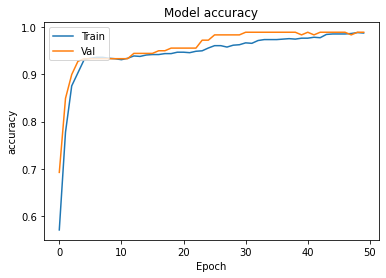

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [92]:
sample = X_test[0:20]
prediction = model.predict(sample)
print(prediction)

score = np.max(prediction)
prediction = np.argmax(prediction)

print(f'Передбачено: {prediction} з достовірністю {score*100:.2f}%', f'Повинно бути: {np.argmax(Y_test[0:20])}')

[[9.9988675e-01 1.1322294e-04]
 [9.9479538e-01 5.2046087e-03]
 [7.7040333e-01 2.2959673e-01]
 [9.9999738e-01 2.6733126e-06]
 [1.9736134e-02 9.8026389e-01]
 [1.0458322e-02 9.8954165e-01]
 [9.9911791e-01 8.8210235e-04]
 [9.9995840e-01 4.1546984e-05]
 [9.9999893e-01 1.0923454e-06]
 [9.9153042e-01 8.4695956e-03]
 [9.9999678e-01 3.2594301e-06]
 [2.0076564e-01 7.9923439e-01]
 [9.9999964e-01 3.9273075e-07]
 [7.7398918e-03 9.9226016e-01]
 [9.9985421e-01 1.4581933e-04]
 [4.1355446e-02 9.5864457e-01]
 [7.0270244e-03 9.9297297e-01]
 [1.4424983e-04 9.9985576e-01]
 [9.9992633e-01 7.3702664e-05]
 [7.7398811e-03 9.9226016e-01]]
Передбачено: 24 з достовірністю 100.00% Повинно бути: 0
